# Image IO
## Load NIFTI file
This example shows how to use tipl::io::nifti to load a nifti file and visualize one axial slice.

In [1]:
#include "TIPL/tipl.hpp" // git clone http://github.com/frankyeh/TIPL/
using namespace tipl;

In [9]:
io::nifti nii;
if(!nii.load_from_file("data/mni_icbm152_t1.nii"))
    return;
nii

sizeof_hdr=348
ndim_info=0
dim[0]=3
dim[1]=193
dim[2]=229
dim[3]=193
dim[4]=1
dim[5]=1
dim[6]=1
dim[7]=1
intent_p1=0
intent_p2=0
intent_p3=0
intent_code=0
datatype=2
bitpix=8
slice_start=0
pixdim[0]=3
pixdim[1]=1
pixdim[2]=1
pixdim[3]=1
pixdim[4]=1
pixdim[5]=1
pixdim[6]=1
pixdim[7]=1
vox_offset=352
scl_slope=1
scl_inter=0
slice_end=0
slice_code=0
xyzt_units=0
scl_inter=0
cal_max=0
cal_min=0
slice_duration=0
toffset=0
descrip=
aux_file=
qform_code=0
sform_code=1
quatern_b=0
quatern_c=1
quatern_d=0
qoffset_x=0
qoffset_y=0
qoffset_z=0
srow_x[0]=1
srow_x[1]=0
srow_x[2]=0
srow_x[3]=-96
srow_y[0]=0
srow_y[1]=1
srow_y[2]=0
srow_y[3]=-132
srow_z[0]=0
srow_z[1]=0
srow_z[2]=1
srow_z[3]=-78
intent_name=


The >> operator will read file into the image volume in "LPS" orientation (default orientation in DICOM).
To read untouched image volume, use 
> nii.get_untouched_image(I);

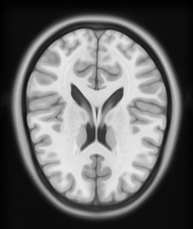

In [10]:
image<3> I;
nii >> I

## DICOM loader
DICOM images are typically saved in 2D slices. Thus here we use 2d image to load it.

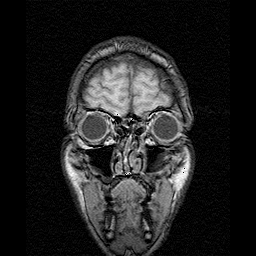

In [11]:
io::dicom dcm;
dcm.load_from_file("data/T1W_dicom/T1W_FFE_i031.dcm");
image<float,2> slice;
dcm >> slice

For loading multiple DICOM slices into 3D volume, use tipl::io::dicom_volume

First we need to find all the DICOM files and store file name in a string vector

In [4]:
#include <stdio.h>
#include <dirent.h>
#include <sys/types.h>
std::vector<std::string> dicom_file_list;
DIR *dir = opendir("data/T1W_dicom");
struct dirent *entry;
while ((entry = readdir(dir))) 
    if(entry->d_name[0] != '.')
        dicom_file_list.push_back(std::string("data/T1W_dicom/")+entry->d_name);
closedir(dir);
dicom_file_list

data/T1W_dicom/T1W_FFE_i031.dcm
data/T1W_dicom/T1W_FFE_i0141.dcm
data/T1W_dicom/T1W_FFE_i041.dcm
data/T1W_dicom/T1W_FFE_i0191.dcm
data/T1W_dicom/T1W_FFE_i0211.dcm
data/T1W_dicom/T1W_FFE_i051.dcm
data/T1W_dicom/T1W_FFE_i0221.dcm
data/T1W_dicom/T1W_FFE_i0231.dcm
data/T1W_dicom/T1W_FFE_i0171.dcm
data/T1W_dicom/T1W_FFE_i0291.dcm
data/T1W_dicom/T1W_FFE_i0261.dcm
data/T1W_dicom/T1W_FFE_i0201.dcm
data/T1W_dicom/T1W_FFE_i0121.dcm
data/T1W_dicom/T1W_FFE_i091.dcm
data/T1W_dicom/T1W_FFE_i011.dcm
data/T1W_dicom/T1W_FFE_i081.dcm
data/T1W_dicom/T1W_FFE_i0251.dcm
data/T1W_dicom/T1W_FFE_i0311.dcm
data/T1W_dicom/T1W_FFE_i0161.dcm
data/T1W_dicom/T1W_FFE_i021.dcm
data/T1W_dicom/T1W_FFE_i0281.dcm
data/T1W_dicom/T1W_FFE_i0301.dcm
data/T1W_dicom/T1W_FFE_i071.dcm
data/T1W_dicom/T1W_FFE_i0241.dcm
data/T1W_dicom/T1W_FFE_i0321.dcm
data/T1W_dicom/T1W_FFE_i061.dcm
data/T1W_dicom/T1W_FFE_i0111.dcm
data/T1W_dicom/T1W_FFE_i0271.dcm
data/T1W_dicom/T1W_FFE_i0101.dcm
data/T1W_dicom/T1W_FFE_i0151.dcm
data/T1W_dicom/T1W_

The >> operator will read image file into LPS orientation
To get untouched image, use reader.get_untouched_image(I);

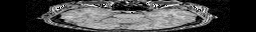

In [13]:
tipl::io::dicom_volume reader;
reader.load_from_files(dicom_file_list);
reader >> I // LPS

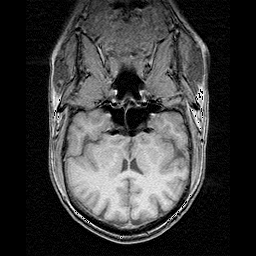

In [14]:
image<float,2> slice;
volume2slice(I,slice,1,10);
slice